## Hypothesis function

In [1]:
import torch
import numpy as np

In [2]:
X_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])

In [3]:
# Simpler Hypothesis Function

W = torch.zeros(1, requires_grad = True)
# b = torch.zeros(1, requires_grad = True)

hypothesis = X_train * W

- H(x) = x가 정확한 모델
- W = 1이 가장 좋은 숫자

## Cost function

- W = 1일때 cost = 0
- 1에서 멀어질수록 높아짐

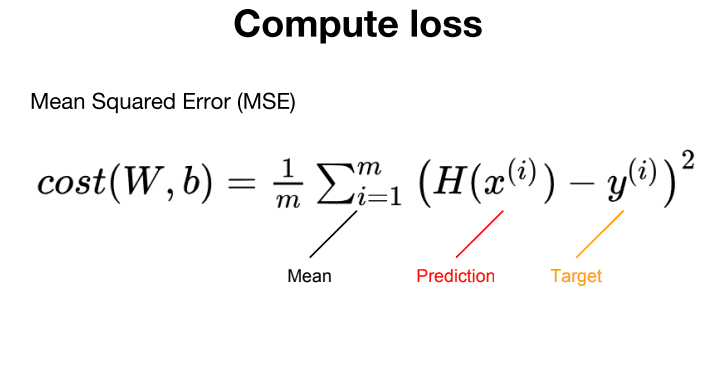

In [4]:
cost = torch.mean((hypothesis - y_train) ** 2)

## Gradient Descent

- 곡선을 내려가야 함
- 기울기가 클수록 더 멀리

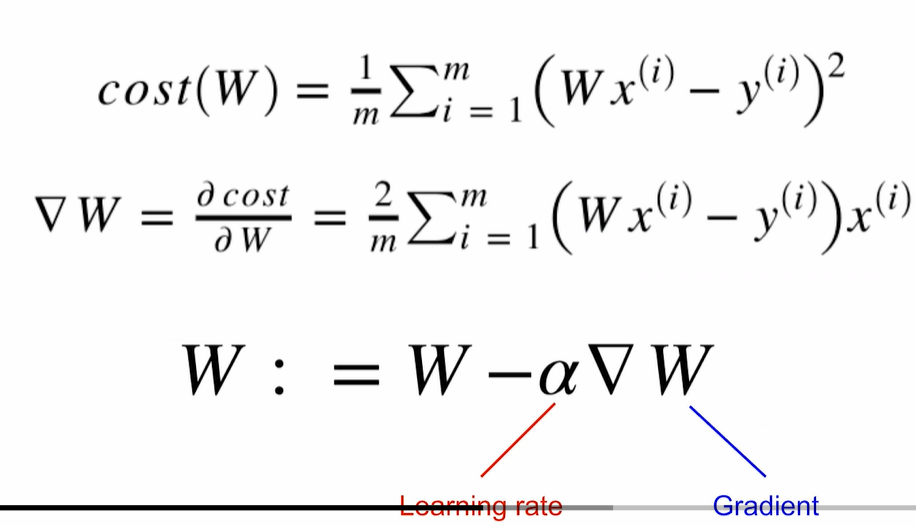

In [5]:
gradient = 2 * torch.mean((W * X_train - y_train) * X_train)
lr = 0.1
# W -= lr * gradient

In [6]:
# 전체 코드

# 데이터
X_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])

# 모델 초기화
W = torch.zeros(1)

# learning_rate 설정
lr = 0.1

nb_epochs = 10
for epoch in range(nb_epochs + 1):
    
    # H(x) 계산
    hypothesis = X_train * W
    
    # cost gradient 계산
    cost = torch.mean((hypothesis - y_train) ** 2)
    gradient = torch.sum((W * X_train - y_train) * X_train)
    
    print('Epoch {:4d}/{} W : {:.3f}, Cost : {:.6f}'.format(
        epoch, nb_epochs, W.item(), cost.item()
    ))
    
    # cost gradient로 H(x) 개선
    W -= lr * gradient

Epoch    0/10 W : 0.000, Cost : 4.666667
Epoch    1/10 W : 1.400, Cost : 0.746666
Epoch    2/10 W : 0.840, Cost : 0.119467
Epoch    3/10 W : 1.064, Cost : 0.019115
Epoch    4/10 W : 0.974, Cost : 0.003058
Epoch    5/10 W : 1.010, Cost : 0.000489
Epoch    6/10 W : 0.996, Cost : 0.000078
Epoch    7/10 W : 1.002, Cost : 0.000013
Epoch    8/10 W : 0.999, Cost : 0.000002
Epoch    9/10 W : 1.000, Cost : 0.000000
Epoch   10/10 W : 1.000, Cost : 0.000000


- 학습하면서 W는 1에 수렴
- Cost가 줄어듬

### torch.optim

- torch.optim 으로도 gradient descent를 할 수 있음
1. optimizer 정의
2. optimizer.zero_grad()로 gradient를 0으로 초기화
3. cost.backward()로 gradient 계산
4. optimizer.step()으로 gradient descent

In [7]:
from torch import optim

# optimizer 설정
optimizer = optim.SGD([W], lr = 0.15)

# cost로 H(x) 개선
optimizer.zero_grad()
# cost.backward()
optimizer.step()

In [8]:
# 전체 코드

# 데이터
X_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])

# 모델 초기화
W = torch.zeros(1, requires_grad = True)

# optimizer 설정
optimizer = optim.SGD([W], lr = 0.15)

nb_epochs = 10
for epoch in range(nb_epochs + 1):
    
    # H(x) 계산
    hypothesis = X_train * W
    
    # cost gradient 계산
    cost = torch.mean((hypothesis - y_train) ** 2)
    
    print('Epoch {:4d}/{} W : {:.3f}, Cost : {:.6f}'.format(
        epoch, nb_epochs, W.item(), cost.item()
    ))
    
    # cost 로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

Epoch    0/10 W : 0.000, Cost : 4.666667
Epoch    1/10 W : 1.400, Cost : 0.746667
Epoch    2/10 W : 0.840, Cost : 0.119467
Epoch    3/10 W : 1.064, Cost : 0.019115
Epoch    4/10 W : 0.974, Cost : 0.003058
Epoch    5/10 W : 1.010, Cost : 0.000489
Epoch    6/10 W : 0.996, Cost : 0.000078
Epoch    7/10 W : 1.002, Cost : 0.000013
Epoch    8/10 W : 0.999, Cost : 0.000002
Epoch    9/10 W : 1.000, Cost : 0.000000
Epoch   10/10 W : 1.000, Cost : 0.000000


- 학습하면서 W는 1에 수렴
- Cost가 줄어듬